In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
!ls
#load data
data = np.loadtxt('housing.txt')
print(data.shape)

Boston-adaptive learning rate.ipynb  boston.ipynb
Boston-batch-adpative learning.ipynb housing.names.txt
Boston-batch.ipynb                   housing.txt
boston-l2_regularization.ipynb
(506, 14)


In [36]:
#separate data into inputs and outputs
x = data[:,:13]
y = data[:,13]

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [37]:
#normalize inputs
#print(x.shape)
for i in range(x.shape[1]):
    #print(i)
    t = x[:,i]
    x[:,i] = (t - np.min(t))/(np.max(t) - np.min(t))


In [38]:
#add bias term
b = np.ones((x.shape[0],1))
x = np.hstack((x,b))
print(x.shape)

(506, 14)


In [39]:
print(x[:5,:])

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.08015267e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02 1.00000000e+00]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01 1.00000000e+00]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 9.89737254e-01
  6.34657837e-02 1.00000000e+00]
 [2.92795719e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.58555279e-01 4.41812564e-01 4.48544590e-01
  8.69565217e-02 6.67938931e-02 6.48936170e-01 9.94276060e-01
  3.33885210e-02 1.00000000e+00]
 [7.05070075e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.87104809e-01 5.28321318e-01 4.48544590e-01


In [40]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)
ytr = ytr.reshape(ytr.shape[0],1)
yte = yte.reshape(yte.shape[0],1)

In [41]:
#uniform random initialization of weights
w = np.random.uniform(0.0,1.0,x.shape[1]).reshape(x.shape[1],1)
print(w)
print(w.shape)

[[0.56743221]
 [0.32608859]
 [0.74414172]
 [0.12252561]
 [0.72687637]
 [0.26232951]
 [0.48279067]
 [0.61989998]
 [0.46133287]
 [0.60368106]
 [0.39762653]
 [0.65670388]
 [0.92225058]
 [0.45891431]]
(14, 1)


In [42]:
#define hyper-parameters
epochs = 2000
lamda = 0.0002
a = 0.07

In [43]:
#linear regression with constant learning rate 
train_acc = []
test_acc = []

m = xtr.shape[0]
n = xtr.shape[1]

mte = xte.shape[0]

for i in range(epochs):
    ybar = np.dot(xtr,w)
    
    #mse error in training set
    err = np.sum((ybar - ytr)**2)/(2*m)
    train_acc.append(err)
    
    #mse error in test set
    tmp = np.dot(xte,w)
    tmp_err = np.sum((tmp - yte)**2)/(2*mte)
    test_acc.append(tmp_err)
    
    #calculate gradient
    del_y = ybar - ytr
    
    for j in range(n):
        xcurr = xtr[:,j]
        xcurr = xcurr.reshape(xcurr.shape[0],1)
        del_w = (sum(del_y[:]*xcurr[:]))/(m)
        
        w[j] = (1- lamda)*w[j] - a*del_w

    if(i%100 == 0):
        print("Train Error", err)
        print("Test Error", tmp_err)

Train Error 235.70547035617108
Test Error 226.2451065713266
Train Error 24.532422085262855
Test Error 22.73451992450238
Train Error 19.72587828268656
Test Error 18.27292084800904
Train Error 17.057989234714974
Test Error 16.157261017276745
Train Error 15.403727379142806
Test Error 14.935080740039059
Train Error 14.323513075483131
Test Error 14.18566783459387
Train Error 13.5902370506225
Test Error 13.708286897467127
Train Error 13.076863750334274
Test Error 13.394548800690634
Train Error 12.707943524659138
Test Error 13.182174409215921
Train Error 12.436595327859886
Test Error 13.033844359035655
Train Error 12.232693255320486
Test Error 12.926540247489587
Train Error 12.076373126936964
Test Error 12.845790803048116
Train Error 11.954260292456881
Test Error 12.782389569250912
Train Error 11.857184721660623
Test Error 12.730440832995113
Train Error 11.778753708263606
Test Error 12.686159177752966
Train Error 11.714439518544564
Test Error 12.647115371185324
Train Error 11.660985554092166


<IPython.core.display.Javascript object>


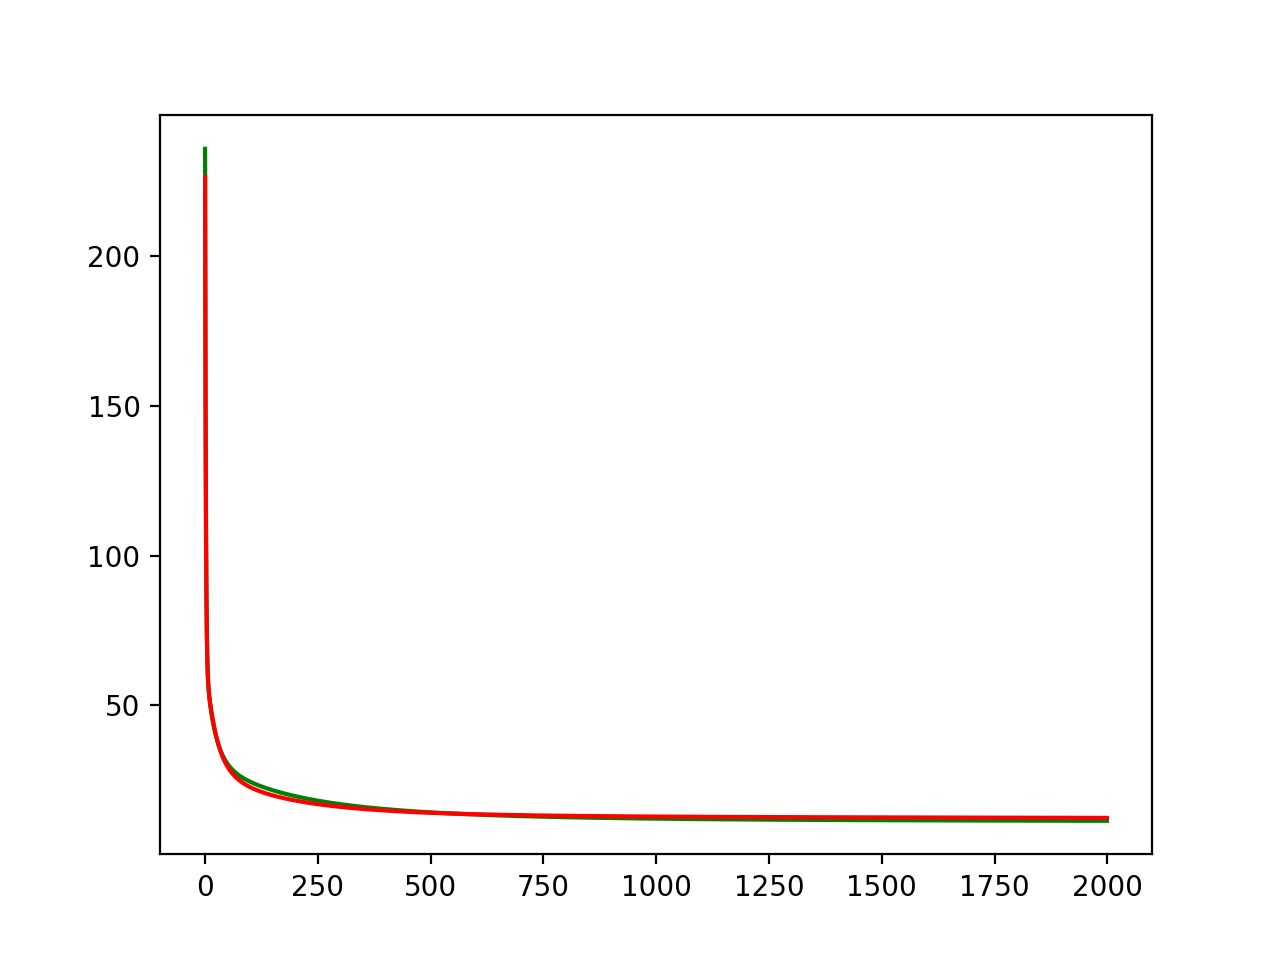

In [44]:
x_axis = np.arange(len(test_acc))
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(x_axis,train_acc,'g')
plt.plot(x_axis,test_acc,'r')
plt.show()